这里不是真正的搞推荐，只是尝试搭建一下 wide & deep 的模型结构。

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2025-05-23 12:42:51.714036: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-23 12:42:51.722264: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-23 12:42:51.792226: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-23 12:42:51.862966: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747975371.919316   54527 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747975371.93

2.19.0
sys.version_info(major=3, minor=11, micro=2, releaselevel='final', serial=0)
matplotlib 3.10.3
numpy 2.1.3
pandas 2.2.3
sklearn 1.6.1
tensorflow 2.19.0
keras._tf_keras.keras 3.9.2


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [5]:
print(x_train.shape[1:])

(8,)


简单的模型示意：

![pic1](./tf09.svg)

In [ ]:
# 这部分在搭建deep模型
# 函数式API 功能API,和之前不一样
input = keras.layers.Input(shape=x_train.shape[1:])
print(input)
# input作为输入
hidden1 = keras.layers.Dense(30, activation='relu')(input)
#hidden1作为输入
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
# 复合函数: f(x) = h(g(x))

concat = keras.layers.concatenate([input, hidden2])
output = keras.layers.Dense(1)(concat)

#然后定义model，放入input，output
model = keras.models.Model(inputs = [input],
                           outputs = [output])

model.summary()
model.compile(loss="mean_squared_error",
              optimizer = keras.optimizers.SGD(0.001))
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-3)]

<KerasTensor shape=(None, 8), dtype=float32, sparse=False, ragged=False, name=keras_tensor>


2025-05-23 12:42:53.857239: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 30)        │        270 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 30)        │        930 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ input_layer[0][0… │
│ (Concatenate)       │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,239 (4.84 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.layers

[<InputLayer name=input_layer, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Concatenate name=concatenate, built=True>,
 <Dense name=dense_2, built=True>]

In [8]:
history = model.fit(x_train_scaled, y_train,
                    validation_data = (x_valid_scaled, y_valid),
                    epochs = 100,
                    callbacks = callbacks)

Epoch 1/100


/home/zhiyue/Documents/myvenv/tf/lib/python3.11/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 8))
  warnings.warn(msg)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9595 - val_loss: 0.8802
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7197 - val_loss: 0.6953
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6419 - val_loss: 0.6567
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5958 - val_loss: 0.6254
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5722 - val_loss: 0.6058
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5582 - val_loss: 0.5832
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5394 - val_loss: 0.5652
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5188 - val_loss: 0.5534
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5140 - val_loss: 0.5437
Epoch 10/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5045 - val_loss: 0.5333
Epoch 11/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4951 - val_loss: 0.5251
Epoch 12/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [9]:
print(history.history)

{'loss': [1.9442572593688965, 0.6913352608680725, 0.6317581534385681, 0.5972666144371033, 0.5714230537414551, 0.5534383058547974, 0.535968542098999, 0.5252794027328491, 0.5134387612342834, 0.5036860108375549, 0.49601900577545166, 0.48927369713783264, 0.4828236997127533, 0.4768630266189575, 0.4713060259819031, 0.46683475375175476, 0.46260249614715576, 0.45756420493125916, 0.4538637399673462, 0.44985923171043396, 0.4461941719055176, 0.4428238272666931, 0.4397617280483246, 0.43653327226638794, 0.4336789548397064, 0.43060487508773804, 0.42828431725502014, 0.42557764053344727, 0.4227480888366699, 0.4207237660884857, 0.41830214858055115, 0.415844202041626, 0.4137595295906067, 0.41187405586242676, 0.4097575545310974, 0.4081140160560608, 0.40589314699172974, 0.40427908301353455, 0.402235746383667, 0.4005247950553894, 0.39930883049964905, 0.39725461602211, 0.39584654569625854, 0.3939233720302582, 0.39237385988235474, 0.39076533913612366, 0.3893541991710663, 0.3885306119918823, 0.386949777603149

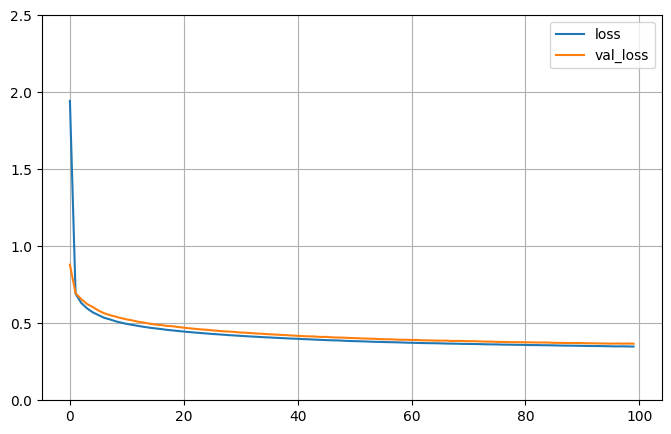

In [10]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 2.5)
    plt.show()
plot_learning_curves(history)

In [11]:
# 不是这个模型不好，而是搭建的比较简单
model.evaluate(x_test_scaled, y_test, verbose=0)

0.37196114659309387